In [1]:
# https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [2]:
# 驗證函數
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

In [3]:
# 驗證一
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [4]:
import pandas_datareader.data as web
# 第一個數據
predict_days = 6 # 用過去七天預測下一天
df = web.DataReader('2330.tw', 'yahoo', '1999-01-01', '2020-06-15')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-3:]

C:\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Date   High    Low   Open  Close      Volume  Adj Close TickerId  \
5034 2020-06-11  327.0  318.5  325.5  320.5  50104255.0      320.5     2330   
5035 2020-06-12  317.5  312.5  313.0  316.0  45992918.0      316.0     2330   
5036 2020-06-15  317.5  308.5  316.0  309.5  50612000.0      309.5     2330   

     TickerName  
5034        台積電  
5035        台積電  
5036        台積電

In [5]:
# 使用台積電股價 驗證  ????
# define input sequence
raw_seq = data.Close #[10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 6
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

In [6]:
for i in range(10):
	print(X[i], y[i])

[69.64900208 71.2141037  69.64900208 67.69249725 70.04019928 68.86630249] 70.8228988647461
[71.2141037  69.64900208 67.69249725 70.04019928 68.86630249 70.82289886] 69.64900207519531
[69.64900208 67.69249725 70.04019928 68.86630249 70.82289886 69.64900208] 71.21410369873047
[67.69249725 70.04019928 68.86630249 70.82289886 69.64900208 71.2141037 ] 73.17060089111328
[70.04019928 68.86630249 70.82289886 69.64900208 71.2141037  73.17060089] 71.99669647216797
[68.86630249 70.82289886 69.64900208 71.2141037  73.17060089 71.99669647] 71.99669647216797
[70.82289886 69.64900208 71.2141037  73.17060089 71.99669647 71.99669647] 71.21410369873047
[69.64900208 71.2141037  73.17060089 71.99669647 71.99669647 71.2141037 ] 72.77909851074219
[71.2141037  73.17060089 71.99669647 71.99669647 71.2141037  72.77909851] 73.56179809570312
[73.17060089 71.99669647 71.99669647 71.2141037  72.77909851 73.5617981 ] 75.51830291748047


In [7]:
# 使用 LSTM 看前看後記憶
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
n_steps = 6
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [8]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [9]:
# fit model
history = model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
5031/5031 [==============================] - ETA: 0s - loss: 1135.4956 - 4s 727us/step - loss: 1112.4332
Epoch 2/50
5031/5031 [==============================] - 3s 569us/step - loss: 8.5846
Epoch 3/50
5031/5031 [==============================] - 3s 546us/step - loss: 12.5262
Epoch 4/50
5031/5031 [==============================] - 3s 596us/step - loss: 9.0242
Epoch 5/50
5031/5031 [==============================] - 3s 568us/step - loss: 8.0483 0s
Epoch 6/50
5031/5031 [==============================] - 3s 570us/step - loss: 8.5222
Epoch 7/50
5031/5031 [==============================] - 3s 556us/step - loss: 7.5005
Epoch 8/50
5031/5031 [==============================] - 3s 563us/step - loss: 7.3117
Epoch 9/50
5031/5031 [==============================] - 3s 547us/step - loss: 6.0091
Epoch 10/50
5031/5031 [==============================] - 3s 551us/step - loss: 6.2435
Epoch 11/50
5031/5031 [==============================] - 3s 544us/step - loss: 6.1185
Epoch 12/50
5031/5031 [=====

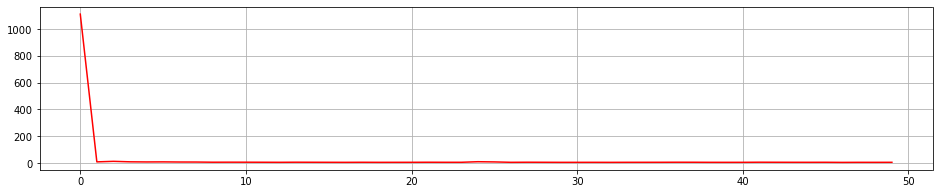

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,3))
plt.grid()
plt.plot( history.history.get('loss') , color='red')
plt.show()

In [12]:
# 使用 Deep Learning 進行預測
# 重要數據
pred_Close = model.predict(X).ravel()
Close = y

sum((pred_Close - Close)**2) / len(Close)

5.179509446203283

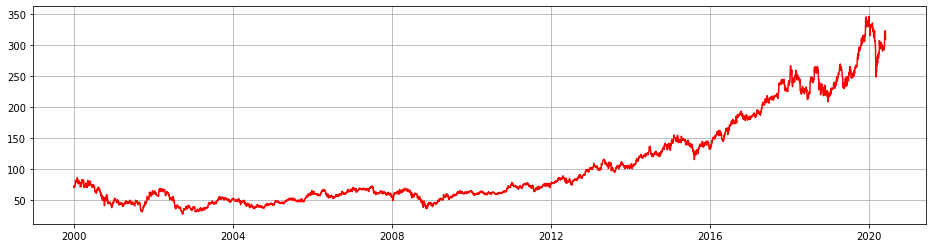

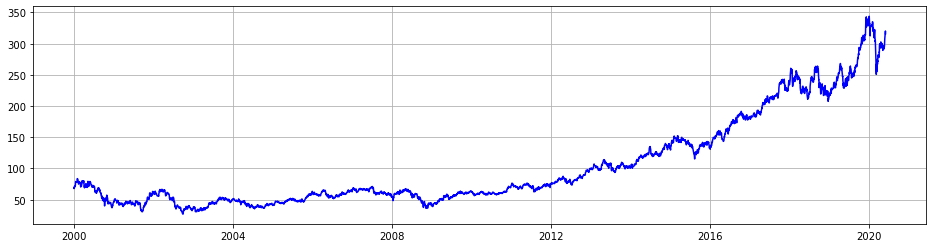

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_plot = data[:len(pred_Close)]

plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), Close, color='red')
plt.show()

plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), pred_Close, color='blue')
plt.show()